In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
#%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/DELL/Desktop/Housing.csv')
df['furnishingstatus']=df['furnishingstatus'].str.replace('-','_')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi_furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
n = len(df)

train_n = int(n*0.6)
val_n = int(n*0.2)
test_n = n-train_n-val_n

In [6]:
np.random.seed(123)
index = np.arange(n)
np.random.shuffle(index)
df_shuffled = df.iloc[index]

In [7]:
df_train = df_shuffled[:train_n].copy()
df_val = df_shuffled[train_n:train_n+val_n].copy()
df_test = df_shuffled[train_n+val_n:].copy()

y_train = df_train.pop('price').values
y_val = df_val.pop('price').values
y_test = df_test.pop('price').values

In [8]:
base = ['area']

In [96]:
def X_prepare(df,base):
    global features
    df = df.copy()
    features = base.copy()
    
    def class_features(df,name,n):
        rank = df[name].value_counts().index
        if n < len(rank):
            for i in rank:
                feature = '%s_%s' % (name,i)
                features.append(feature)
                df[feature] = (df[name] == i).astype(int)
        else:
            for i in rank[:n]:
                feature = '%s_%s' % (name,i)
                features.append(feature)
                df[feature] = (df[name] == i).astype(int)
                
    class_features(df,'bedrooms',4)
    class_features(df,'bathrooms',3)
    class_features(df,'stories',4)
    class_features(df,'mainroad',2)
    class_features(df,'guestroom',2)
    class_features(df,'hotwaterheating',2)
    class_features(df,'basement',2)
    class_features(df,'airconditioning',1)
    
    df_1 = df[features].copy()
    df_1 = df_1.fillna(0)
    X = df_1.values
    return X

In [97]:
def regressor(X,y,alpha):
    ones = np.ones(X.shape[0])      
    X = np.column_stack((ones,X)) 
    
    A = X.T.dot(X)
    I = np.eye(A.shape[0])
    
    B = np.linalg.inv(A+alpha*I)
    w = B.dot(X.T).dot(y)
    
    return w[0],w[1:]

In [98]:
def rmse(y_pre,y):
    dif = y_pre-y
    dif_square = np.square(dif)
    return np.sqrt(np.mean(dif_square))
    #return np.sqrt(np.mean(np.square(dif)))

In [99]:
X_train = X_prepare(df_train,base)
X_val = X_prepare(df_val,base)

In [100]:
for i in [0,0.1,0.01,0.001,0.0001]:
    w_0,w = regressor(X_train,y_train,i)
    y_pre = w_0 + X_val.dot(w)
    rmse_1 = rmse(y_pre,y_val)
    print('%6.4f:%s'%(i,rmse_1))

0.0000:16852166.690154277
0.1000:1013575.5367462354
0.0100:1015119.739011284
0.0010:1015276.4550686147
0.0001:1015292.1492652273


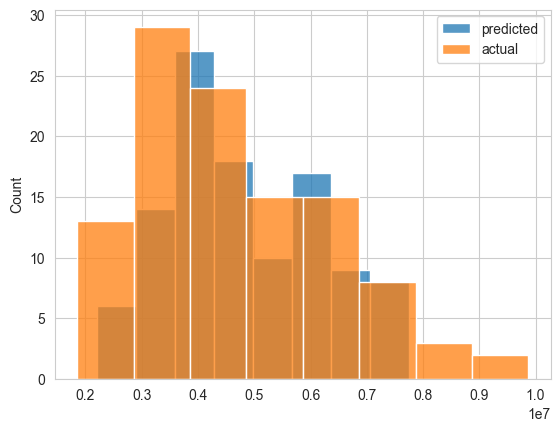

In [101]:
w_0,w = regressor(X_train,y_train,0.1)
y_pre = w_0 + X_val.dot(w)
#rmse_1 = rmse(y_pre,y_val)
sns.histplot(y_pre,label='predicted')
sns.histplot(y_val,label='actual')
plt.legend()